# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import os
from datetime import date

# Import API key
from api_keys import api_key
#api_key = "e28aacf98b3ecd73afecc188ae4c71b7"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

591
mataura


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={api_key}&q="

#cities = ["Paris", "blahblah", "Oslo", "Beijing"]

# set up lists to hold reponse info
city_lst = []
cloudiness_lst = []
country_lst = []
date_lst = []
humidity_lst = []
lat_lst = []
lng_lst = []
max_temp_lst = []
wind_speed_lst =[]
log_var = []

if os.path.exists("citylog.log"):
  os.remove("citylog.log")
else:
  print("citylog.log")

# Loop through the list of cities and perform a request for data on each
x = 1
x2 = 1
with open("citylog.log","a") as citylog:
    citylog.write("Beginning Data Retrieval\n")
    print("Beginning Data Retrieval")
    citylog.write("------------------------\n")
    print("------------------------")
for city in cities:
    with open("citylog.log","a") as citylog:
        citylog.write(f"Processing Record {x} of set {x2} | {city}\n")
        citylog.write(query_url + city + "\n")
    
    response = requests.get(query_url + city).json()
    response_str = str(response)
    if "city not found" not in response_str:
        print (f"Processing record {x} of set {x2} | {city}")
        #print (f"this city werks - {city}")
        log_var.append("\n" + str(response) + "\n")
        city_lst.append(city)
        cloudiness_lst.append(response['clouds']['all'])
        country_lst.append(response['sys']['country'])
        date_lst.append(response['dt'])
        humidity_lst.append(response['main']['humidity'])
        lat_lst.append(response['coord']['lat'])
        lng_lst.append(response['coord']['lon'])
        max_temp_lst.append(response['main']['temp'])
        wind_speed_lst.append(response['wind']['speed'])
        time.sleep(.5)
        #print (f"Sleep 2 row {x}")
        x += 1
        if x % 50 == 0:
            x = 1
            x2 += 1
    else:
        print (f"Processing record {x} of set {x2} | {city}")
        print("City not found.  Skipping...")
        #print (f"***this city sucks***- {city}")
        with open("citylog.log","a") as citylog:     
            citylog.write("City not found.  Skipping...\n")
        x += 1   

 # create a data frame from cities, lat, and temp
weather_dict = {
     "City": city_lst,
     "Cloudiness": cloudiness_lst,
     "Country": country_lst,
     "Date": date_lst,
     "Humidity": humidity_lst,
     "Lat": lat_lst,
     "Lng": lng_lst,
     "Max Temp": max_temp_lst,
     "Wind Speed": wind_speed_lst
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()
#pprint.pprint(response)
#type (weather_df)
#type(response)


Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | mataura
Processing record 2 of set 1 | albany
Processing record 3 of set 1 | east london
Processing record 4 of set 1 | thompson
Processing record 5 of set 1 | walvis bay
Processing record 6 of set 1 | tsihombe
City not found.  Skipping...
Processing record 7 of set 1 | beira
Processing record 8 of set 1 | kahului
Processing record 9 of set 1 | fairbanks
Processing record 10 of set 1 | lebu
Processing record 11 of set 1 | ardea
Processing record 12 of set 1 | turukhansk
Processing record 13 of set 1 | sistranda
Processing record 14 of set 1 | kodiak
Processing record 15 of set 1 | marawi
Processing record 16 of set 1 | healdsburg
Processing record 17 of set 1 | chokurdakh
Processing record 18 of set 1 | ushuaia
Processing record 19 of set 1 | hobart
Processing record 20 of set 1 | hilo
Processing record 21 of set 1 | bambanglipuro
Processing record 22 of set 1 | bluff
Processing record 23 of set 1 | barrow

Processing record 37 of set 4 | haines junction
Processing record 38 of set 4 | vrangel
Processing record 39 of set 4 | saint-leu
Processing record 40 of set 4 | kavieng
Processing record 41 of set 4 | castro
Processing record 42 of set 4 | tuggurt
City not found.  Skipping...
Processing record 43 of set 4 | mildura
Processing record 44 of set 4 | vikevag
Processing record 45 of set 4 | vestmannaeyjar
Processing record 46 of set 4 | kadykchan
City not found.  Skipping...
Processing record 47 of set 4 | ponta do sol
Processing record 48 of set 4 | vardo
Processing record 49 of set 4 | front royal
Processing record 1 of set 5 | westport
Processing record 2 of set 5 | provideniya
Processing record 3 of set 5 | la romana
Processing record 4 of set 5 | ximei
Processing record 5 of set 5 | attawapiskat
City not found.  Skipping...
Processing record 6 of set 5 | reconquista
Processing record 7 of set 5 | laguna
Processing record 8 of set 5 | whitehaven
Processing record 9 of set 5 | esperance

Processing record 24 of set 8 | bafoussam
Processing record 25 of set 8 | yangambi
Processing record 26 of set 8 | marcona
City not found.  Skipping...
Processing record 27 of set 8 | blonduos
City not found.  Skipping...
Processing record 28 of set 8 | deh rawud
City not found.  Skipping...
Processing record 29 of set 8 | ribeirao branco
Processing record 30 of set 8 | ust-kuyga
Processing record 31 of set 8 | terrace
Processing record 32 of set 8 | goma
Processing record 33 of set 8 | port lincoln
Processing record 34 of set 8 | mount isa
Processing record 35 of set 8 | gweta
Processing record 36 of set 8 | jensen beach
Processing record 37 of set 8 | shu
Processing record 38 of set 8 | meulaboh
Processing record 39 of set 8 | kontagora
Processing record 40 of set 8 | gorontalo
Processing record 41 of set 8 | mazatan
City not found.  Skipping...
Processing record 42 of set 8 | hofn
Processing record 43 of set 8 | kautokeino
Processing record 44 of set 8 | grand gaube
Processing recor

Processing record 10 of set 12 | oderzo
Processing record 11 of set 12 | tagusao
Processing record 12 of set 12 | shenzhen
Processing record 13 of set 12 | meyungs
City not found.  Skipping...
Processing record 14 of set 12 | yerbogachen
Processing record 15 of set 12 | caconda
Processing record 16 of set 12 | los llanos de aridane
Processing record 17 of set 12 | lulea
Processing record 18 of set 12 | banamba
Processing record 19 of set 12 | rungata
City not found.  Skipping...
Processing record 20 of set 12 | kargasok
Processing record 21 of set 12 | acari
Processing record 22 of set 12 | milyutinskaya
Processing record 23 of set 12 | dicabisagan
Processing record 24 of set 12 | port augusta
Processing record 25 of set 12 | slavutych
Processing record 26 of set 12 | kysyl-syr
Processing record 27 of set 12 | barabai
Processing record 28 of set 12 | ulaangom
Processing record 29 of set 12 | ulaanbaatar
Processing record 30 of set 12 | sorong
Processing record 31 of set 12 | blagoyevo


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,48,NZ,1566586956,86,-46.19,168.86,41.0,5.99
1,albany,75,US,1566587152,47,42.65,-73.75,73.6,5.82
2,east london,20,ZA,1566587218,82,-33.02,27.91,64.4,8.05
3,thompson,90,CA,1566587218,87,55.74,-97.86,59.0,2.24
4,walvis bay,0,NA,1566587219,11,-22.95,14.51,89.6,10.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df.to_csv("weatherdata.csv")

In [16]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,48,NZ,1566586956,86,-46.19,168.86,41.0,5.99
1,albany,75,US,1566587152,47,42.65,-73.75,73.6,5.82
2,east london,20,ZA,1566587218,82,-33.02,27.91,64.4,8.05
3,thompson,90,CA,1566587218,87,55.74,-97.86,59.0,2.24
4,walvis bay,0,NA,1566587219,11,-22.95,14.51,89.6,10.29


In [17]:
weather_df.count()

City          524
Cloudiness    524
Country       524
Date          524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

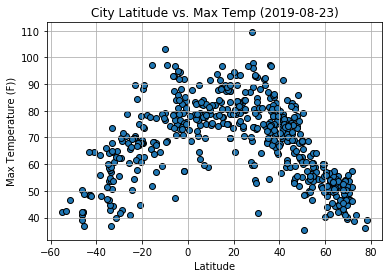

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black")

now_dt = date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp ({now_dt})")
plt.ylabel("Max Temperature (F))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvsmaxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

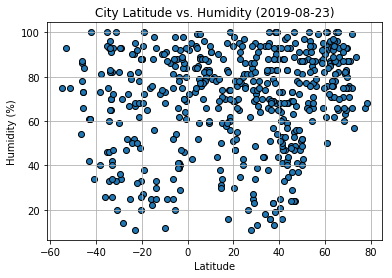

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({now_dt})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvshumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

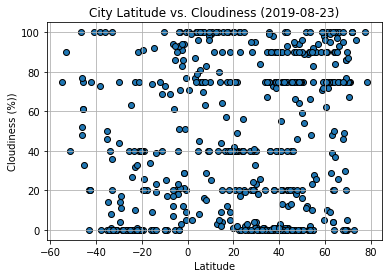

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({now_dt})")
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvscloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

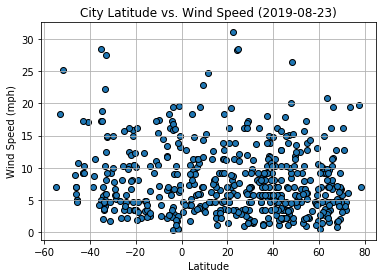

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors="black")

now_dt = date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({now_dt})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvswind.png")

# Show plot
plt.show()